In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature, io

%matplotlib inline
from IPython.display import HTML, display

# Image filters and features detection

In this lab we will implement a solution to perfom features detection on images. (In our case edges and corners)

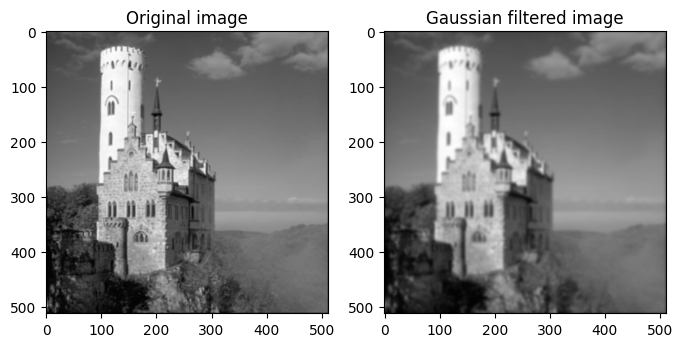

In [2]:
# Gaussian smoothing : 
# 1. perform Gaussin smoothing on an input grayscale image
# 2. try with different values of sigma and observe the effect of the smoothing
# 3. compute the partial derivatives of the smoothed image in x and y directions
# 4. threshold the gradient magnitude image to obtain a binary edge image
# 5. compare the results with the original image

# Load an input image and convert it to grayscale  
original_img = io.imread('data/images/castle.png')

# check if image is rgb or already in greyscale, convert to greyscale(in case its RGB),
# in both cases convert image to float
if(len(original_img.shape)==3):
    img_grey = img_as_float(color.rgb2gray(original_img))
elif(len(original_img.shape)==2):
    img_grey = img_as_float(original_img)

# Apply gaussian filter
sigma = np.sqrt(4) # TRY WITH OTHER VALUES!                         => higher the value, more the blur effects
img_smooth = filters.gaussian(img_grey, sigma)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(original_img, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(img_smooth, cmap=cm.gist_gray)
plt.title('Gaussian filtered image');

### Image gradient
To performe a first derivative of an image on the horizontal direction, we can perform a convolution of the image with kernel $k = [-0.5 , 0.5]$

The magnitude of the gradient is $G = \sqrt{I_x^2+I_y^2}$.

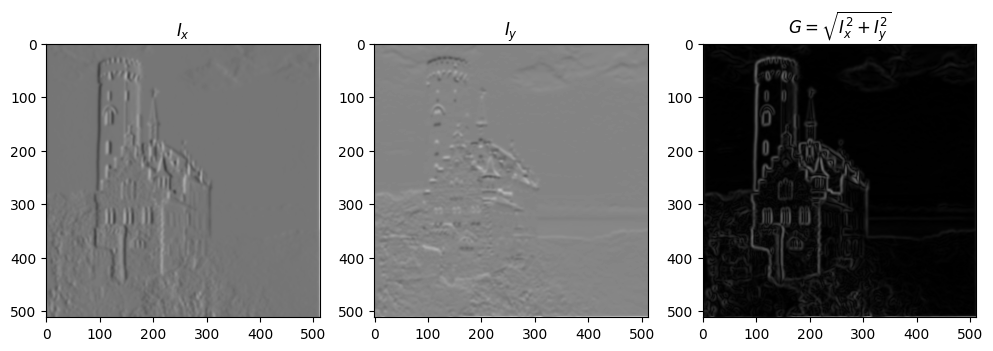

In [3]:
# Partial derivatives kernel
k = np.array([-0.5, 0, 0.5])
# k = np.array([-1, 1])
# k = np.array([-1, 0, 1])
# k = np.array([-2, 0, 2])
# k = np.array([-5, 0, 5])

# Compute first derivative along x
Ix = np.zeros_like(img_grey)
for i, r in enumerate(img_smooth):
        Ix[i, :] = signal.convolve(r, k, mode='same')

# Compute first derivative along y
Iy = np.zeros_like(img_grey)
for i, c in enumerate(img_smooth.T):
        Iy[:, i] = signal.convolve(c, k, mode='same')

# Compute the magnitude of the gradient
G = np.sqrt(Ix**2 + Iy**2)


plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(Ix, cmap=cm.gist_gray)
plt.title(r'$I_x$')
plt.subplot(132)
plt.imshow(Iy, cmap=cm.gist_gray)
plt.title(r'$I_y$')
plt.subplot(133)
plt.imshow(G, cmap=cm.gist_gray)
plt.title(r'$G = \sqrt{I_x^2+I_y^2}$')
plt.tight_layout;

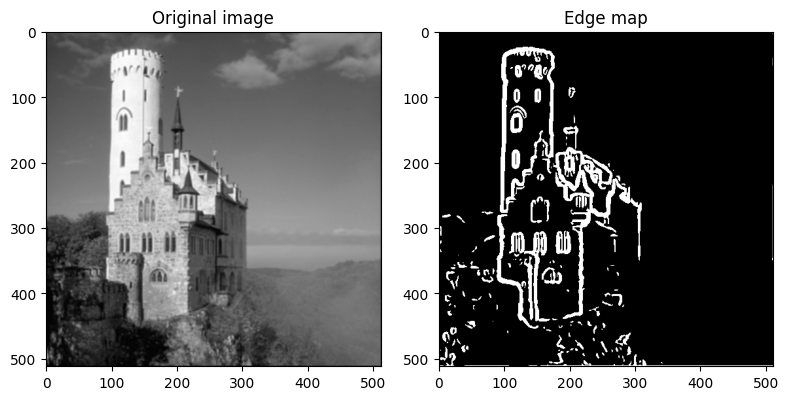

In [5]:
# Apply the gradient and after that the thresholding is used to detect the edges

threshold = 0.03 # TRY WITH OTHER VALUES!                         
edge = np.where(G > threshold, 1, 0)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(original_img, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(edge, cmap=cm.gist_gray)
plt.title('Edge map');
plt.tight_layout()

In [6]:
# Define a function to perform edge detection

def edge_detector(img, sigma, threshold):
    """Perform edge detection on an input RGB image.
    
    - img: (n, m) input RGB image
    - sigma: float, standard deviation of the Gaussian smoothing
    - threshold: float, threshold value for the gradient
    """
    
    # Apply Gaussian filter
    img_smooth = filters.gaussian(img, sigma)
    
    # Compute first derivatives with the following kernel
    k = np.array([-0.5, 0, 0.5])

    # Compute first derivative along x
    Ix = np.zeros(img_smooth.shape)
    for i, r in enumerate(img_smooth):
        
        Ix[i, :] = signal.convolve(r, k, mode='same')

    # Compute first derivative along y
    Iy = np.zeros(img_smooth.shape)
    for i, c in enumerate(img_smooth.T):
        Iy[:, i] = signal.convolve(c, k, mode='same')

    # Compute the mangnitude of the gradient
    G = np.sqrt(Ix**2 + Iy**2)
    
    # Generate edge map
    edge = np.where(G > threshold, 255, 0)
    
    return edge

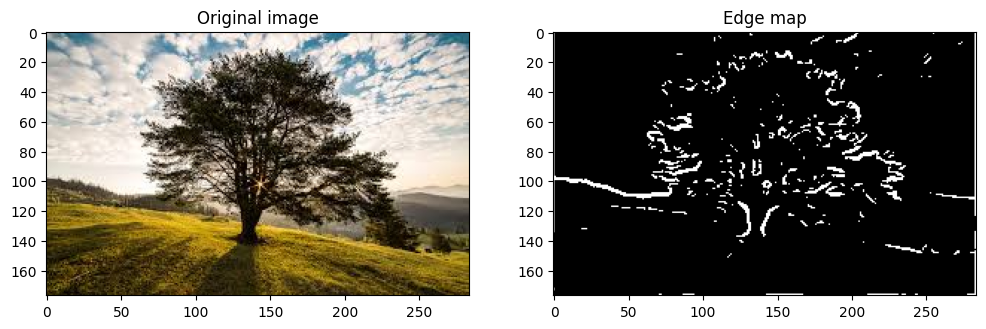

In [7]:
# Run some edge detection
original_img = io.imread('data/images/tree.jpeg')

# check if image is rgb or already in greyscale, convert to greyscale(in case its RGB),
# in both cases convert image to float

if(len(original_img.shape)==3):
    img_grey = img_as_float(color.rgb2gray(original_img))
elif(len(original_img.shape)==2):
    img_grey = img_as_float(original_img)


# edge detector with argument meaning : img, sigma, threshold
edge = edge_detector(img_grey, np.sqrt(1), 0.12)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(original_img, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(edge, cmap=cm.gist_gray)
plt.title('Edge map');

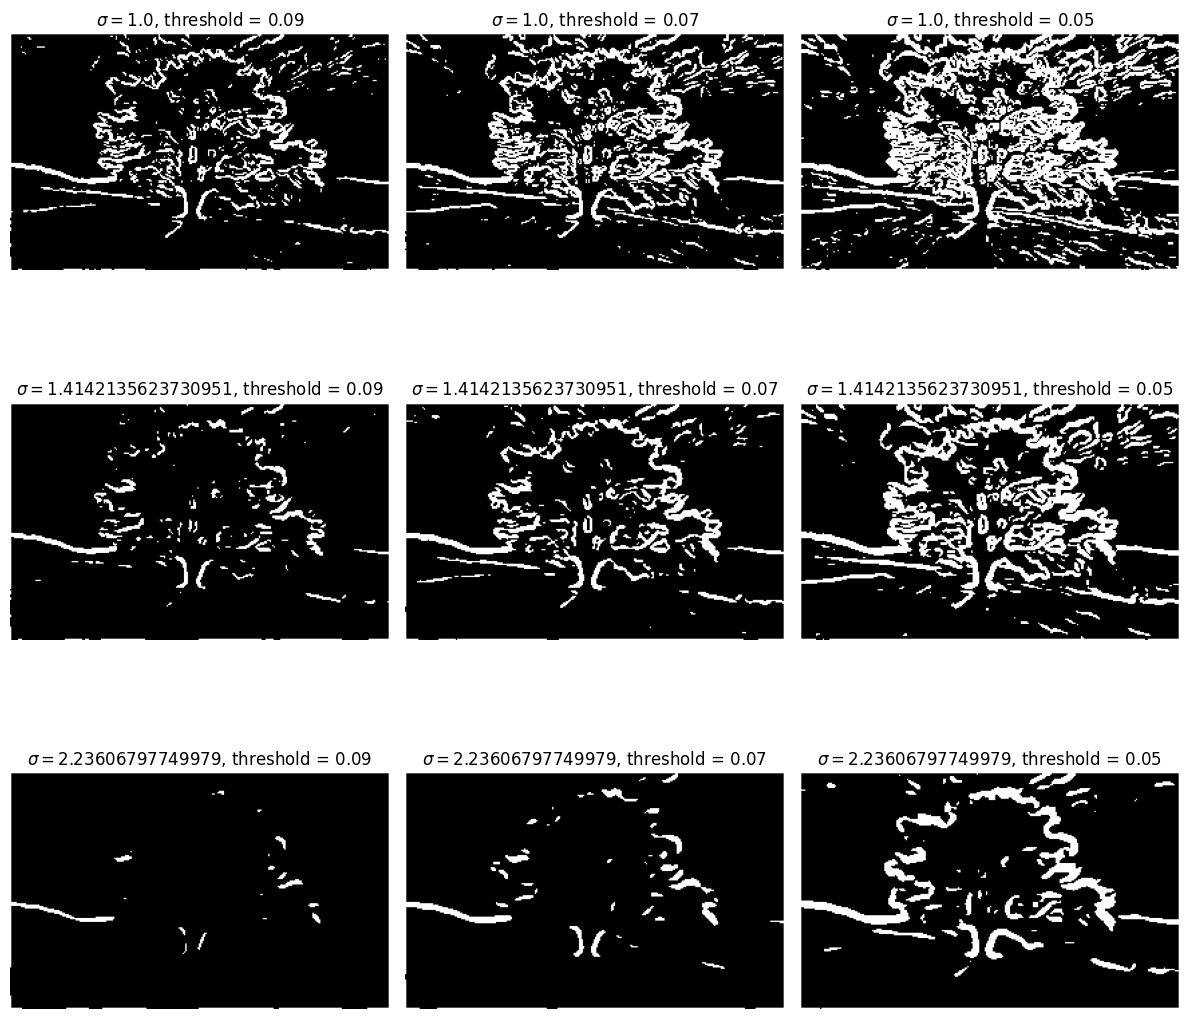

In [8]:
# Now i want to compare the efect of choosing 2 different threshold values and 3 different sigma values in a plot grid 3x3

thresholds = [0.09, 0.07, 0.05]
sigmas = [np.sqrt(1), np.sqrt(2), np.sqrt(5)]

original_img = io.imread('data/images/tree.jpeg')

if(len(original_img.shape)==3):
    img_grey = img_as_float(color.rgb2gray(original_img))
elif(len(original_img.shape)==2):
    img_grey = img_as_float(original_img)

edge_maps = []
for sigma in sigmas:
    for threshold in thresholds:
        edge = edge_detector(img_grey, sigma, threshold)
        edge_maps.append(edge)

# Build the plot grid
plt.figure(figsize=(12,12))
for i, edge in enumerate(edge_maps):
    plt.subplot(3, 3, i+1)
    plt.imshow(edge, cmap=cm.gist_gray)
    plt.title(r'$\sigma = {}$, threshold = {}'.format(sigmas[i//3], thresholds[i%3]))
    plt.axis('off')
plt.tight_layout()

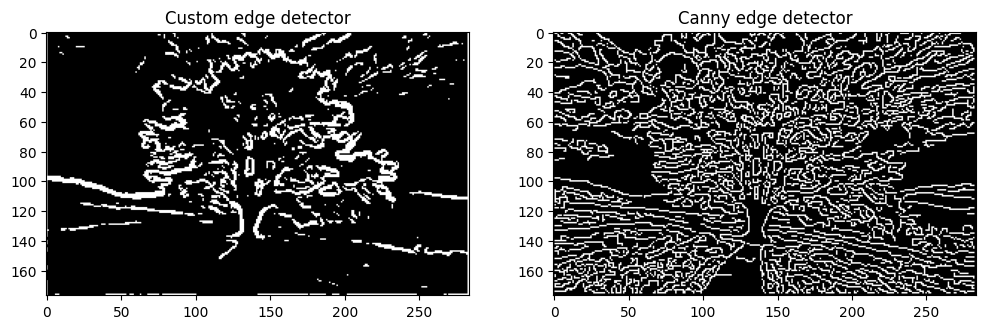

In [10]:
# Compare our custom edge detector with the Canny edge detector

# Apply the Canny edge detector
edge_canny = feature.canny(img_grey, sigma=1, low_threshold=0.09, high_threshold=0.17)

plt.figure(figsize=(12,6))
plt.subplot(121)
edge_custom = edge_detector(img_grey, np.sqrt(1), 0.09)
plt.imshow(edge_custom, cmap=cm.gist_gray)
plt.title('Custom edge detector')
plt.subplot(122)
plt.imshow(edge_canny, cmap=cm.gist_gray)
plt.title('Canny edge detector');



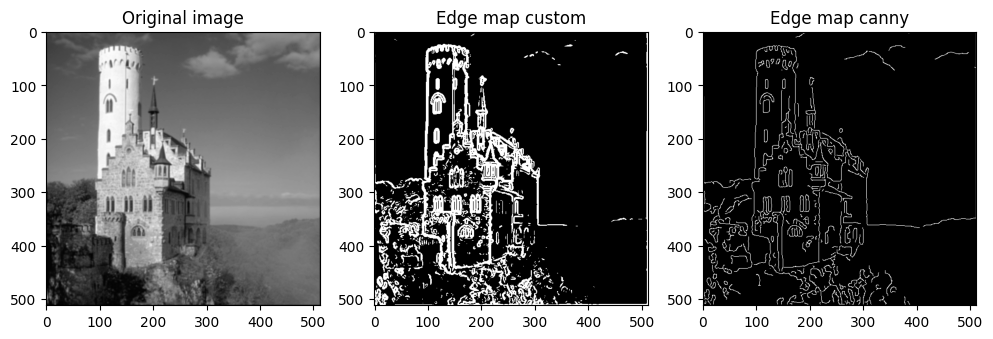

In [11]:
# Run some edge detection

original_img = io.imread('data/images/castle.png')



# check if image is rgb or already in greyscale, convert to greyscale(in case its RGB),
# in both cases convert image to float

if(len(original_img.shape)==3):
    img_grey = img_as_float(color.rgb2gray(original_img))
elif(len(original_img.shape)==2):
    img_grey = img_as_float(original_img)


edge = edge_detector(img_grey, np.sqrt(1), 0.027)
# using the same sigma and threshold values as in the custom edge detector
edge_canny = feature.canny(img_grey, sigma=2, low_threshold=0.09, high_threshold=0.17)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(original_img, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(edge, cmap=cm.gist_gray)
plt.title('Edge map custom')
plt.subplot(133)
plt.imshow(edge_canny, cmap=cm.gist_gray)
plt.title('Edge map canny');

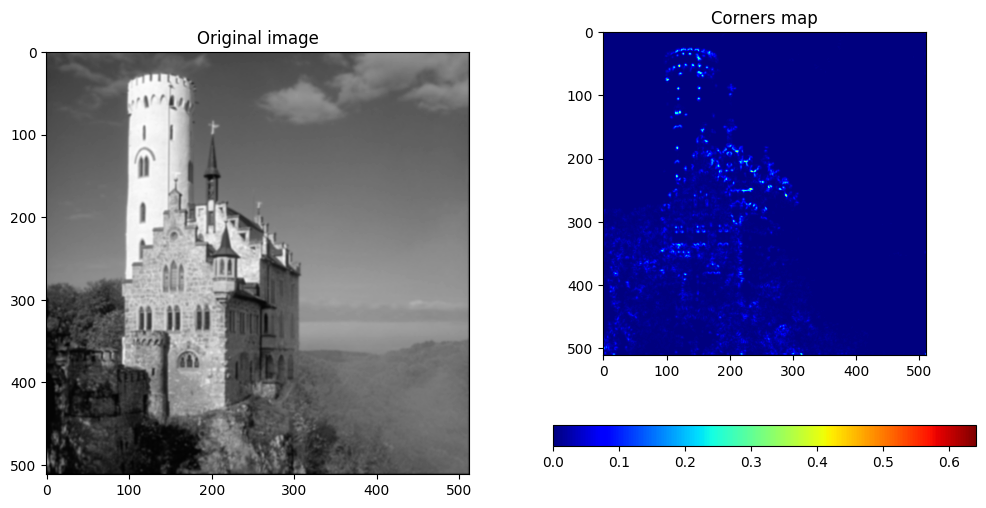

In [12]:
# Corner detection

# Load an input image and convert it to grayscale
original_img = io.imread('data/images/castle.png')

# check if image is rgb or already in greyscale, convert to greyscale(in case its RGB),
# in both cases convert image to float

if(len(original_img.shape)==3):
    img_grey = img_as_float(color.rgb2gray(original_img))
elif(len(original_img.shape)==2):
    img_grey = img_as_float(original_img)
    
corners_map = feature.corner_shi_tomasi(img_grey)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(original_img, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(corners_map, cmap=cm.jet)
plt.colorbar(orientation='horizontal')
plt.title('Corners map');

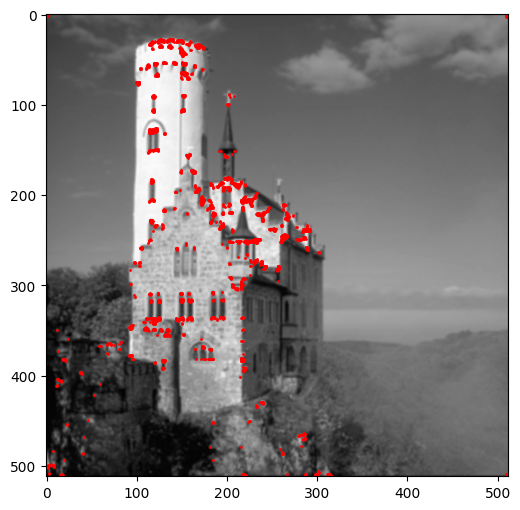

In [13]:
threshold = 0.1
naive_corners = np.where(corners_map > threshold)

plt.figure(figsize=(12,6))
plt.imshow(original_img, cmap=cm.gist_gray)
plt.scatter(naive_corners[1], naive_corners[0], s=1, c='r');

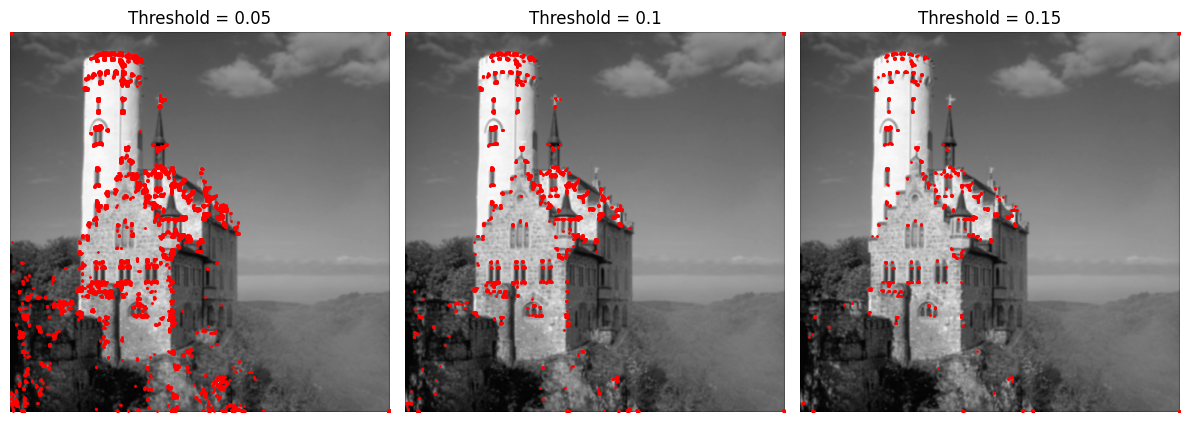

In [14]:
# Plot a grid of corner detection results with different threshold values

thresholds = [0.05, 0.1, 0.15]
corners_maps = []

for threshold in thresholds:
    corners_map = feature.corner_shi_tomasi(img_grey)
    corners_maps.append(np.where(corners_map > threshold))

plt.figure(figsize=(12,12))
for i, corners in enumerate(corners_maps):
    plt.subplot(1, 3, i+1)
    plt.imshow(original_img, cmap=cm.gist_gray)
    plt.scatter(corners[1], corners[0], s=1, c='r')
    plt.title('Threshold = {}'.format(thresholds[i]))
    plt.axis('off')
plt.tight_layout()

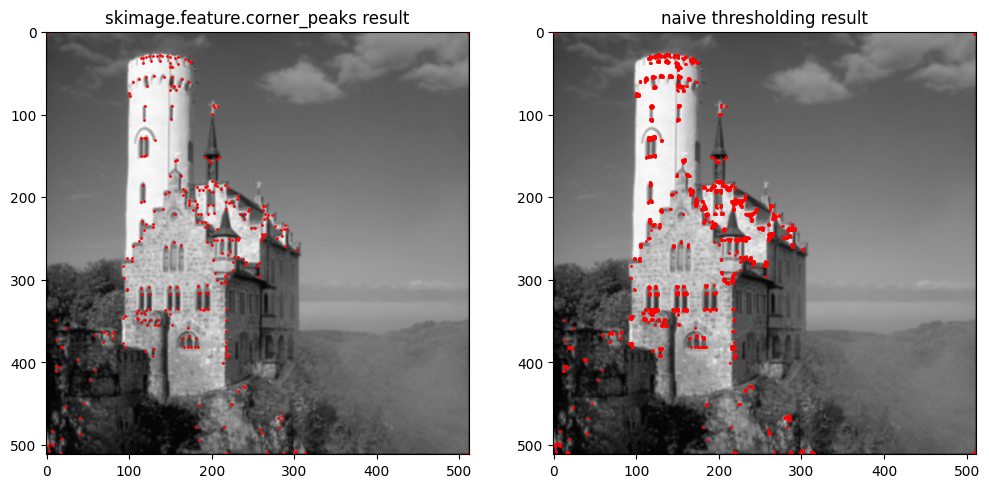

In [15]:
# Using another algorithm for corner detection 

#original_img = io.imread('castle.png')

# check if image is rgb or already in greyscale, convert to greyscale(in case its RGB),
# in both cases convert image to float

if(len(original_img.shape)==3):
    img_grey = color.rgb2gray(original_img)
elif(len(original_img.shape)==2):
    img_grey = original_img
    
corners = feature.corner_peaks(feature.corner_shi_tomasi(img_grey),threshold_abs=0.1)


plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(original_img, cmap=cm.gist_gray)
plt.scatter(corners[:,1], corners[:,0], s=1, c='r')
plt.title('skimage.feature.corner_peaks result')

plt.subplot(122)
plt.imshow(original_img, cmap=cm.gist_gray)
plt.scatter(naive_corners[1], naive_corners[0], s=1, c='r')
plt.title('naive thresholding result');